In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:

import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize
from us import states

#set ggplot style
plt.style.use('ggplot')


In [3]:
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [4]:
#results

In [5]:
#print(requests.get(url))

In [6]:
#print(requests.get(url).json())

In [7]:
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))
#marked out due to API stuff discussed with Brent

In [8]:
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [9]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [10]:
# Reorganizing the columns using double brackets
organized_df = health_df[["locationabbr","year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","education", "geolocation"]]
organized_df.head

<bound method NDFrame.head of       locationabbr  year    locationdesc                      topicdesc  \
0               NM  2011      New Mexico              Cigar Use (Youth)   
1               OK  2005        Oklahoma              Cigar Use (Youth)   
2               NY  2005        New York  Smokeless Tobacco Use (Youth)   
3               AL  1997         Alabama  Smokeless Tobacco Use (Youth)   
4               SC  2007  South Carolina              Cigar Use (Youth)   
5               DE  2005        Delaware  Smokeless Tobacco Use (Youth)   
6               SD  2013    South Dakota  Smokeless Tobacco Use (Youth)   
7               AL  2005         Alabama  Smokeless Tobacco Use (Youth)   
8               SD  2009    South Dakota  Smokeless Tobacco Use (Youth)   
9               UT  1997            Utah          Cigarette Use (Youth)   
10              RI  2015    Rhode Island  Smokeless Tobacco Use (Youth)   
11              ND  2013    North Dakota              Cigar Use (Youth

In [11]:
latlong2 = (pd.concat({i: json_normalize(x) for i, x in organized_df.pop('geolocation').items()})
         .reset_index(level=1, drop=True)
         .join(organized_df)
         .reset_index(drop=True))
latlong2.head()

,coordinates,type,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,education
0,"[-106.240580985, 34.520880952]",Point,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School
1,"[-97.521070214, 35.472031356]",Point,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School
2,"[-75.543970427, 42.827001032]",Point,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School
3,"[-86.631860762, 32.840571122]",Point,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School
4,"[-81.045371207, 33.998821303]",Point,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School


In [12]:
latlong3 = pd.DataFrame(latlong2["coordinates"].values.tolist())
latlong3.head()

,0,1
0,-106.240581,34.520881
1,-97.521070,35.472031
2,-75.543970,42.827001
3,-86.631861,32.840571
4,-81.045371,33.998821


In [13]:
renamedlatlong = latlong3.rename(columns={0:"Lat",1:"Lon"})
renamedlatlong.head()

,Lat,Lon
0,-106.240581,34.520881
1,-97.521070,35.472031
2,-75.543970,42.827001
3,-86.631861,32.840571
4,-81.045371,33.998821


In [14]:
new_df = pd.merge(organized_df, renamedlatlong, left_index=True, right_index=True, how='inner')
new_df.head()

,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,education,Lat,Lon
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,-106.240581,34.520881
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,-97.521070,35.472031
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,-75.543970,42.827001
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,-86.631861,32.840571
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,-81.045371,33.998821


In [15]:
organized_df = new_df
organized_df.head()

,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,education,Lat,Lon
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,-106.240581,34.520881
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,-97.521070,35.472031
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,-75.543970,42.827001
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,-86.631861,32.840571
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,-81.045371,33.998821


In [16]:
renamed_df = organized_df.rename(columns={"locationabbr":"Location Code","year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Respondents","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","education":"Education"})
renamed_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,-106.240581,34.520881
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,-97.521070,35.472031
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,-75.543970,42.827001
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,-86.631861,32.840571
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,-81.045371,33.998821


In [17]:
Minus_Nat= renamed_df.loc[renamed_df["State"] !="National (States and DC)"]
Minus_PR = Minus_Nat.loc[Minus_Nat["State"] !="Puerto Rico"]
Minus_NatPRGuam = Minus_PR.loc[Minus_PR["State"] !="Guam"]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
0,NM,2011,New Mexico,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,Middle School,-106.240581,34.520881
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,-97.521070,35.472031
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,-75.543970,42.827001
3,AL,1997,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Asian,High School,-86.631861,32.840571
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,-81.045371,33.998821


In [18]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()
USA.count()

Location Code       22644
Year                22644
State               22644
Use Type            22644
Status              22644
Frequency           22644
% of Respondents    22644
Sample Size         22644
Gender              22644
Age                 22644
Race                22644
Education           22644
Lat                 22644
Lon                 22644
dtype: int64

In [19]:
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()


,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
1,OK,2005,Oklahoma,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,3.1,128,Overall,All Ages,Hispanic,High School,-97.521070,35.472031
2,NY,2005,New York,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,1.4,700,Overall,All Ages,Asian,High School,-75.543970,42.827001
4,SC,2007,South Carolina,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,0.2,694,Female,All Ages,All Races,High School,-81.045371,33.998821
5,DE,2005,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.1,2684,Overall,All Ages,All Races,High School,-75.577741,39.008831
7,AL,2005,Alabama,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.1,570,Female,All Ages,All Races,High School,-86.631861,32.840571


In [20]:
USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

    

C:\Users\ccampisi\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [21]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
grouped_usa_df = USA.groupby(['Year','Gender']).mean()

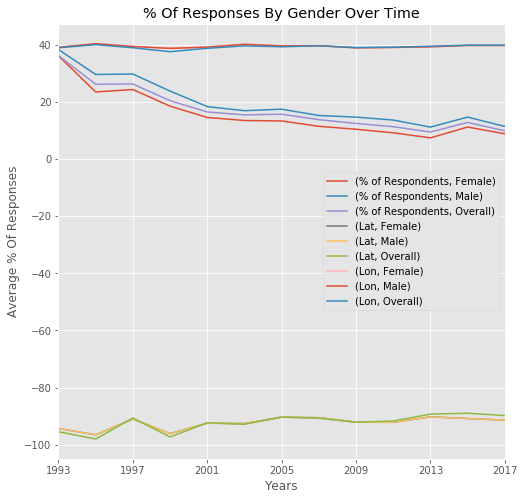

In [22]:

# Use unstack() to Plot all users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
grouped_usa_df.unstack().plot(ax=ax)
plt.title("% Of Responses By Gender Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Responses")
leg = ax.legend()







In [23]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
23,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,42.1,119,Overall,All Ages,Hispanic,High School,-81.045371,33.998821
41,IN,2015,Indiana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,118,Overall,All Ages,Multiple Race,High School,-86.149960,39.766910
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,High School,-81.045371,33.998821
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,High School,-72.082691,42.276870
131,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,51.6,2490,Overall,All Ages,All Races,High School,-111.763811,34.865970


In [24]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()

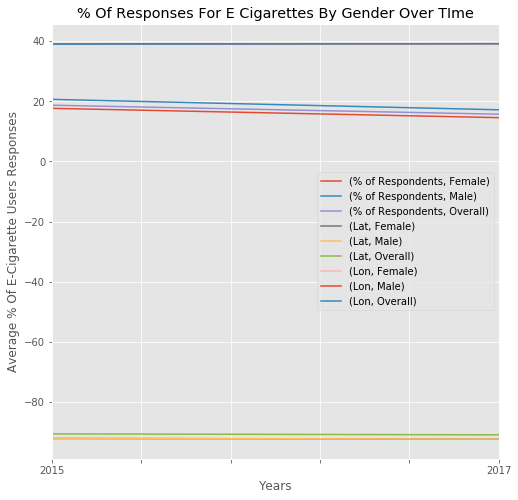

In [25]:
# Use unstack() to Plot the E-Cigarette users response as a line chart

fig, ax = plt.subplots(figsize=(8,8))
USA_eCig_Avg.unstack().plot(ax=ax)
plt.title("% Of Responses For E Cigarettes By Gender Over TIme")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()




In [26]:
grouped_usa_Ethinicity = USA.groupby(['Year','Race']).mean()

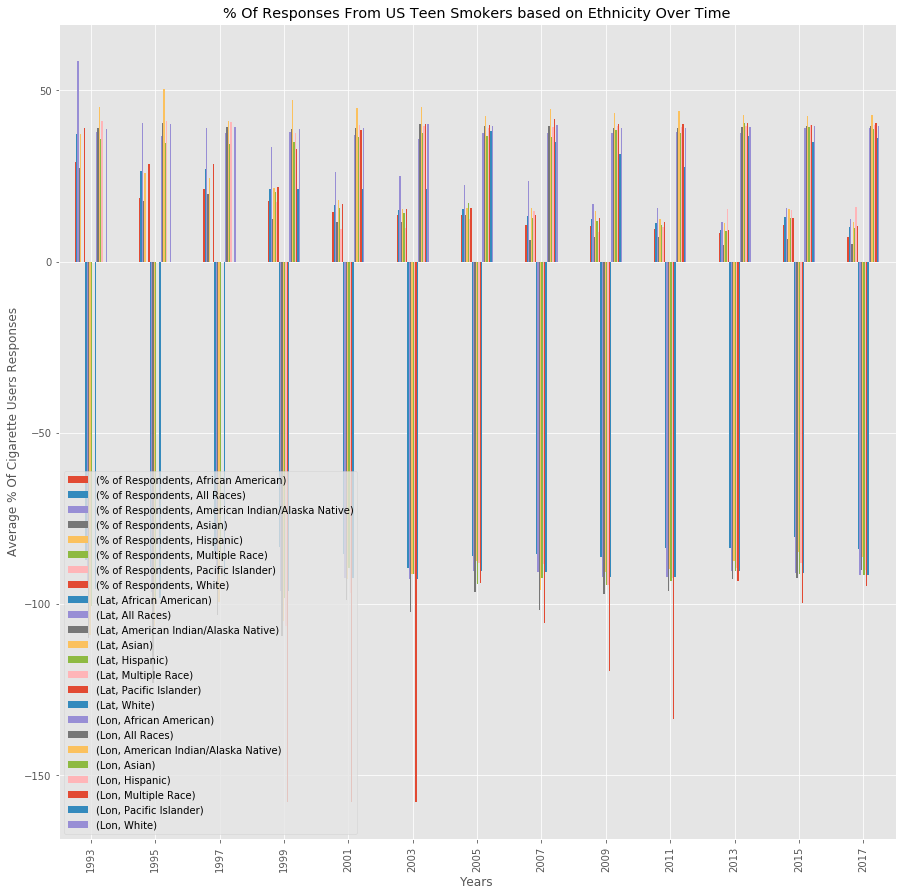

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
grouped_usa_Ethinicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen Smokers based on Ethnicity Over Time")
plt.xlabel("Years")
plt.ylabel("Average % Of Cigarette Users Responses")
leg = ax.legend()

In [28]:
USA_eCig_Etinicity = USA_eCig.groupby(['Year','Race']).mean()

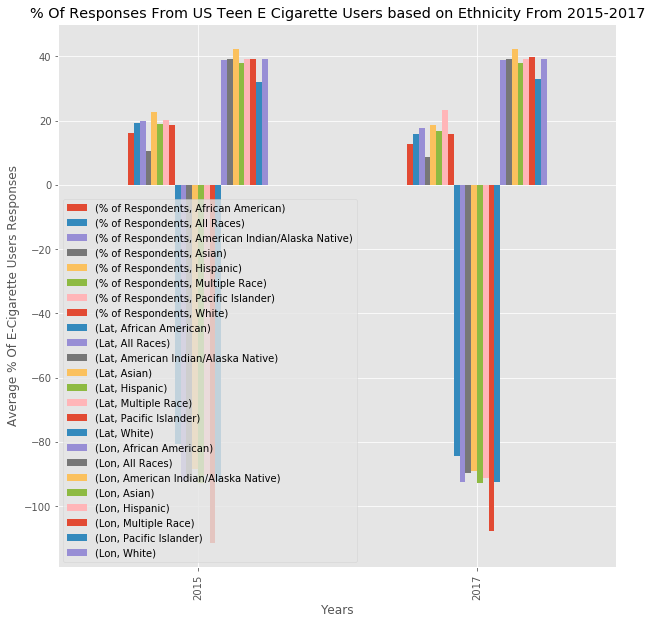

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
USA_eCig_Etinicity.unstack().plot.bar(ax=ax)
plt.title("% Of Responses From US Teen E Cigarette Users based on Ethnicity From 2015-2017")
plt.xlabel("Years")
plt.ylabel("Average % Of E-Cigarette Users Responses")
leg = ax.legend()

In [30]:
grouped_usa_Frequency = USA.groupby(['Year']).size()
grouped_usa_Frequency


Year
1993     285
1995     492
1997     594
1999     803
2001    1083
2003    1385
2005    1603
2007    1934
2009    2267
2011    2393
2013    2621
2015    3499
2017    3685
dtype: int64

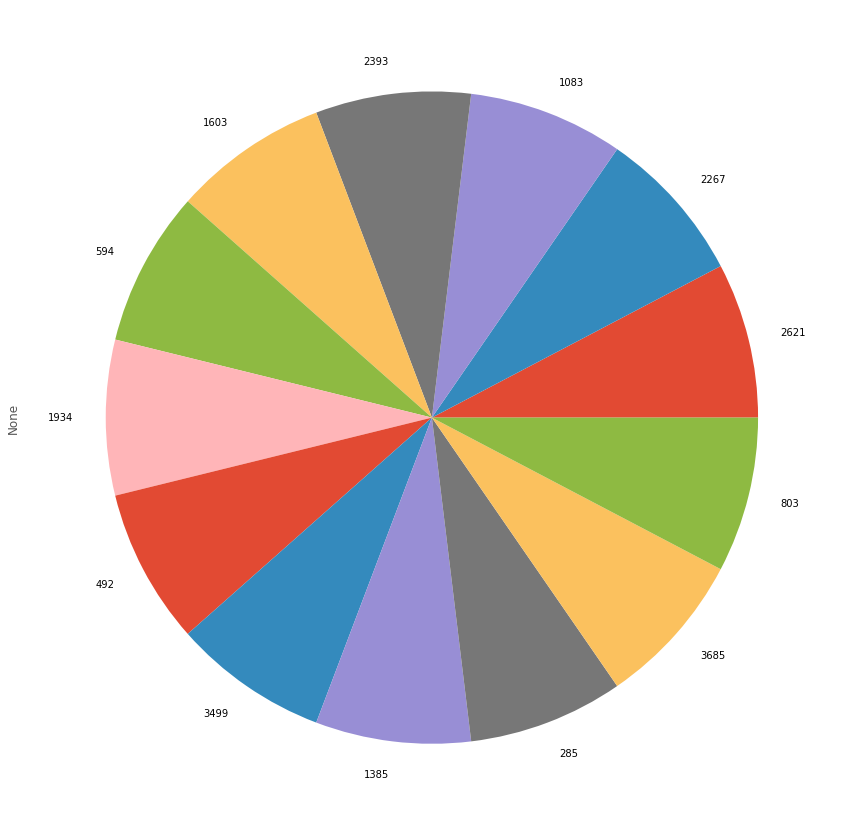

In [31]:
grouped_usa_Frequency.value_counts().plot(kind='pie',figsize=(15,15))

In [32]:

Avg_USA=USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)


In [34]:
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
2366,US,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,High School,-95.712891,37.09024
7236,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,High School,-95.712891,37.09024
7244,US,1995,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Pacific Islander,High School,-95.712891,37.09024
7251,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,High School,-95.712891,37.09024
7261,US,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,High School,-95.712891,37.09024


In [35]:
no_null_National =National.dropna(how='any')
no_null_National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
2366,US,2015,National (States and DC),E-Cigarette Use (Youth),User Status,Current E-Cigarette User,25.8,721,Overall,All Ages,Multiple Race,High School,-95.712891,37.09024
7236,US,2011,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,5.4,7450,Female,All Ages,All Races,High School,-95.712891,37.09024
7251,US,2013,National (States and DC),Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.6,6467,Female,All Ages,All Races,High School,-95.712891,37.09024
7261,US,2009,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.5,6698,Overall,All Ages,White,High School,-95.712891,37.09024
7282,US,2003,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.9,372,Overall,All Ages,Asian,High School,-95.712891,37.09024


In [36]:
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
149,OH,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,NaN,NaN,Overall,All Ages,Asian,High School,-82.40426,40.06021
246,OH,2005,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Multiple Race,High School,-82.40426,40.06021
287,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,American Indian/Alaska Native,High School,-82.40426,40.06021
365,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,High School,-82.40426,40.06021
478,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,High School,-82.40426,40.06021


In [37]:
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
478,OH,1999,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,22.1,1993,Overall,All Ages,All Races,High School,-82.40426,40.06021
494,OH,2003,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4,544,Male,All Ages,All Races,High School,-82.40426,40.06021
572,OH,2005,Ohio,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,22.2,661,Male,All Ages,All Races,High School,-82.40426,40.06021
696,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,51.5,1339,Overall,All Ages,All Races,High School,-82.40426,40.06021
831,OH,2013,Ohio,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.2,864,Overall,All Ages,White,High School,-82.40426,40.06021


In [39]:
no_null_National.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents     object
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
Lat                 float64
Lon                 float64
dtype: object

In [40]:
#no_null_State.t0 float

no_null_National[['% of Respondents']]=no_null_National[['% of Respondents']].astype(float)

In [41]:
no_null_OH[['% of Respondents']]=no_null_OH[['% of Respondents']].astype(float)

In [42]:
no_null_OH.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
Lat                 float64
Lon                 float64
dtype: object

In [33]:
#state_counts = converted_df["Race"].value_counts()
#state_counts.head()
# Finding the average weight of all students
#no_null_State["% of Respondents"].mean()

In [43]:
no_null_National.dtypes

Location Code        object
Year                 object
State                object
Use Type             object
Status               object
Frequency            object
% of Respondents    float64
Sample Size          object
Gender               object
Age                  object
Race                 object
Education            object
Lat                 float64
Lon                 float64
dtype: object

In [44]:
# USA[['% of Respondents']]=USA[['% of Respondents']].astype(float)

In [45]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Location Code','Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])


# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [46]:
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Respondents  \
Location Code Year Use Type                      Status         Frequency                       Gender  Age      Race             Education                       
OH            1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              29.0   
                                                                                                Male    All Ages All Races        High School              30.4   
                                                                                                Overall All Ages African American High School              14.2   
                                                                                                                 All Races        High School              29.7   
                                                                                                                 White            High School              32.8   
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School              66.0   
                                                                                                Male    All Ages All Races        High School              71.0   
                                                                                                Overall All Ages African American High School              65.1   
                                                                                                                 All Races        High School              68.6   
                                                                                                                 White            High School              68.8   
                                                                Frequent Cigarette Smoker       Female  All Ages All Races        High School              12.3   
                                                                                                Male    All Ages All Races        High School              16.1   
                                                                                                Overall All Ages African American High School               3.3   
                                                                                                                 All Races        High School              14.3   
                                                                                                                 White            High School              16.6   
              1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School              32.0   
                                                                                                Male    All Ages All Races        High School              36.9   
                                                                                                Overall All Ages African American High School              19.6   
                                                                                                                 All Races        High School              34.5   
                                                                                                                 White            High School              38.1   
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School              67.8   
                                                                                                Male    All Ages All Races        High School              70.5   
                                                                                                Overall All Ages African American High School              67.3   
                                                                    

In [47]:
grouped_usa_comparison = grouped_usa_df.mean()
grouped_usa_comparison

% of Respondents    17.496282
Lat                -92.340653
Lon                 39.346787
dtype: float64

In [ ]:
#combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})
#combined_df

In [50]:
#combined_df = pd.merge(grouped_usa_comparison, grouped_OH_comparison,left_on=['Location Code','Year','Gender'],right_on=['Location Code','Year','Gender'],how="outer")
#combined_df.fillna(0)


In [51]:
#combined_df = combined_df.rename(columns={"% of Respondents_x":"% of USA","% of Respondents_y":"% of Ohio"})
#combined_df.fillna(0)

In [52]:
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
23,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,42.1,119,Overall,All Ages,Hispanic,High School,-81.045371,33.998821
41,IN,2015,Indiana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,118,Overall,All Ages,Multiple Race,High School,-86.149960,39.766910
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,High School,-81.045371,33.998821
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,High School,-72.082691,42.276870
131,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,51.6,2490,Overall,All Ages,All Races,High School,-111.763811,34.865970


In [53]:
USA_eCig2017=USA_eCig.loc[USA["Year"] ==("2017")]
USA_eCig2017.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
26422,NM,2017,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,26.9,2773,Male,All Ages,All Races,High School,-106.240581,34.520881
26467,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
26499,ME,2017,Maine,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,24.0,310,Overall,All Ages,Asian,High School,-68.985031,45.254229
26504,NH,2017,New Hampshire,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,2.0,317,Overall,All Ages,Asian,High School,-71.500361,43.655950
26508,DC,2017,District of Columbia,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.0,193,Overall,All Ages,Asian,High School,-77.031961,38.890371


In [63]:
USA_eCig2017Gender=USA_eCig2017.loc[USA["Gender"] ==("Overall")]
USA_eCig2017Race=USA_eCig2017Gender.loc[USA["Race"] ==("All Races")]
USA_eCig2017Users=USA_eCig2017Race.loc[USA["Frequency"] ==("Current E-Cigarette User")]
USA_eCig2017Users.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
26467,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
26562,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,High School,-80.712640,38.665510
26565,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,High School,-85.774491,35.680941
26731,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,High School,-99.365721,41.641041
26790,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,High School,-76.609260,39.290581


In [68]:
USA_eCig2017HS=USA_eCig2017Users.loc[USA["Education"] ==("High School")]
USA_eCig2017HS


,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
26562,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,High School,-80.712640,38.665510
26565,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,High School,-85.774491,35.680941
26731,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,High School,-99.365721,41.641041
26790,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,High School,-76.609260,39.290581
27033,CA,2017,California,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1673,Overall,All Ages,All Races,High School,-121.000000,37.638640
27106,WI,2017,Wisconsin,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.6,1869,Overall,All Ages,All Races,High School,-89.816371,44.393191
27160,AK,2017,Alaska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,1233,Overall,All Ages,All Races,High School,-147.722059,64.845080
27193,MO,2017,Missouri,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,10.9,1587,Overall,All Ages,All Races,High School,-92.566300,38.635791
27763,ID,2017,Idaho,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1646,Overall,All Ages,All Races,High School,-114.363730,43.682630
28038,MT,2017,Montana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,22.5,4503,Overall,All Ages,All Races,High School,-109.424421,47.066529


In [69]:
USA_eCig2017MS=USA_eCig2017Users.loc[USA["Education"] ==("Middle School")]
USA_eCig2017MS

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
26467,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
26819,DE,2017,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.7,2814,Overall,All Ages,All Races,Middle School,-75.577741,39.008831
26869,NM,2017,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,10.9,6713,Overall,All Ages,All Races,Middle School,-106.240581,34.520881
27325,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.9,1984,Overall,All Ages,All Races,Middle School,-80.712640,38.665510
28189,ND,2017,North Dakota,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.7,2323,Overall,All Ages,All Races,Middle School,-100.118421,47.475320
28401,NV,2017,Nevada,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.8,1489,Overall,All Ages,All Races,Middle School,-117.071841,39.493240
28540,FL,2017,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.6,5833,Overall,All Ages,All Races,Middle School,-81.928961,28.932040
28625,KY,2017,Kentucky,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,3.9,1328,Overall,All Ages,All Races,Middle School,-84.774971,37.645970
28855,HI,2017,Hawaii,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,6233,Overall,All Ages,All Races,Middle School,-157.857749,21.304850
28932,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.7,21721,Overall,All Ages,All Races,Middle School,-76.609260,39.290581


In [93]:
# Store 'Lat' and 'Lng' into  locations 
locations2017 = USA_eCig2017HS[["Lon", "Lat"]].astype(float)

# Convert % of Respondents to float and store
user_rate2017 = USA_eCig2017HS["% of Respondents"].astype(float)

In [96]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2017, weights=user_rate2017, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
USA_eCig2015=USA_eCig.loc[USA["Year"] ==("2015")]
USA_eCig2015.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
23,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,42.1,119,Overall,All Ages,Hispanic,High School,-81.045371,33.998821
41,IN,2015,Indiana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,118,Overall,All Ages,Multiple Race,High School,-86.149960,39.766910
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,High School,-81.045371,33.998821
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,High School,-72.082691,42.276870
131,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,51.6,2490,Overall,All Ages,All Races,High School,-111.763811,34.865970


In [64]:
USA_eCig2015Gender=USA_eCig2015.loc[USA["Gender"] ==("Overall")]
USA_eCig2015Race=USA_eCig2015Gender.loc[USA["Race"] ==("All Races")]
USA_eCig2015Users=USA_eCig2015Race.loc[USA["Frequency"] ==("Current E-Cigarette User")]
USA_eCig2015Users.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,High School,-81.045371,33.998821
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,High School,-72.082691,42.276870
2658,VA,2015,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.6,2225,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
3709,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,27.5,2528,Overall,All Ages,All Races,High School,-111.763811,34.865970
3771,MI,2015,Michigan,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.0,4803,Overall,All Ages,All Races,High School,-84.714390,44.661320


In [66]:
USA_eCig2015HS=USA_eCig2015Users.loc[USA["Education"] ==("High School")]
USA_eCig2015HS

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
54,SC,2015,South Carolina,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,19.7,1333,Overall,All Ages,All Races,High School,-81.045371,33.998821
97,MA,2015,Massachusetts,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.7,3077,Overall,All Ages,All Races,High School,-72.082691,42.276870
3709,AZ,2015,Arizona,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,27.5,2528,Overall,All Ages,All Races,High School,-111.763811,34.865970
3771,MI,2015,Michigan,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.0,4803,Overall,All Ages,All Races,High School,-84.714390,44.661320
3853,IL,2015,Illinois,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,26.6,3173,Overall,All Ages,All Races,High School,-88.997710,40.485010
4789,KY,2015,Kentucky,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.4,2525,Overall,All Ages,All Races,High School,-84.774971,37.645970
6454,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.5,2662,Overall,All Ages,All Races,High School,-75.577741,39.008831
7085,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1282,Overall,All Ages,All Races,High School,-100.373531,44.353130
7318,PA,2015,Pennsylvania,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.1,2831,Overall,All Ages,All Races,High School,-77.860700,40.793730
10527,AL,2015,Alabama,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.5,1528,Overall,All Ages,All Races,High School,-86.631861,32.840571


In [67]:
USA_eCig2015MS=USA_eCig2015Users.loc[USA["Education"] ==("Middle School")]
USA_eCig2015MS

,Location Code,Year,State,Use Type,Status,Frequency,% of Respondents,Sample Size,Gender,Age,Race,Education,Lat,Lon
2658,VA,2015,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.6,2225,Overall,All Ages,All Races,Middle School,-78.457890,37.542681
3910,KY,2015,Kentucky,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,12.1,1562,Overall,All Ages,All Races,Middle School,-84.774971,37.645970
4946,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Middle School,-81.928961,28.932040
8116,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,8.4,2961,Overall,All Ages,All Races,Middle School,-75.577741,39.008831
8391,HI,2015,Hawaii,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,6146,Overall,All Ages,All Races,Middle School,-157.857749,21.304850
13654,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,7.6,25863,Overall,All Ages,All Races,Middle School,-76.609260,39.290581
14400,RI,2015,Rhode Island,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,7.6,2408,Overall,All Ages,All Races,Middle School,-71.522470,41.708280
19035,NM,2015,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,12.0,3055,Overall,All Ages,All Races,Middle School,-106.240581,34.520881
19937,DC,2015,District of Columbia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.8,8301,Overall,All Ages,All Races,Middle School,-77.031961,38.890371
25462,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,2.9,13458,Overall,All Ages,All Races,Middle School,-72.517641,43.625381


In [97]:
# Store 'Lat' and 'Lng' into  locations 
locations2015 = USA_eCig2015HS[["Lon", "Lat"]].astype(float)

# Convert % of Respondents to float and store
user_rate2015 = USA_eCig2015HS["% of Respondents"].astype(float)

In [98]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2015, weights=user_rate2015, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))